Import library  yang akan kita gunakan 

In [1]:
import os
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Tahap inisiasi awal dengan membuat sebuah path yang akan mengarahkan ke dalam folder gambar yang telah kita buat (Combined) 

In [2]:
#membuat variable folder dengan bantuan array 
folders = ['Avocado', 'Banana', 'DragonFruit', 'Durian', 'Guava', 'Grape', 'Jackfruit','Langsat', 'Mango','Mangostan','Orange','Papaya','Pear', 'Pineapple', 'Rambutan', 'Salak','Sapodilla', 'Soursop','Strawberry','WaterMelon']

In [3]:
#Data inputan folder
base_input_folder = 'CombinedV2/262/'
#Data output folder
base_clean_folder = 'Cleaned_Dataset/262/'
base_augmented_folder = 'Augmented_Dataset/262/'

Tahap clean data gambar 

In [4]:
# Fungsi untuk membersihkan data gambar
def clean_image_folder(input_folder, output_folder, target_size=(128, 128)):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    images = []
    for filename in os.listdir(input_folder):
        # Memproses hanya file dengan ekstensi yang telah ditentukan
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(input_folder, filename)
            try:
                # Memuat gambar
                img = Image.open(img_path)
                
                # Mengubah ukuran gambar
                img = img.resize(target_size)
                
                # Mengonversi gambar ke RGB
                img = img.convert('RGB')
                
                # Normalisasi gambar
                img_array = np.array(img) / 255.0
                
                # Menyimpan gambar yang sudah dibersihkan ke folder output
                clean_img_path = os.path.join(output_folder, filename)
                img.save(clean_img_path)
                
                images.append(img_array)
                print(f'Processed and saved: {clean_img_path}')
            except Exception as e:
                print(f'Error processing image {img_path}: {e}')
    
    return np.array(images)


In [11]:
cleaned_images_count = {}

In [13]:
#Membuat folder untuk data clean
for folder in folders:
    image_folder = os.path.join(base_input_folder, folder)
    output_clean_folder = os.path.join(base_clean_folder, folder)

     # Pembersihan data gambar
    cleaned_images = clean_image_folder(image_folder, output_clean_folder)
    print(f'Total cleaned images in {folder}: {len(cleaned_images)}')

     # Simpan jumlah cleaned images untuk setiap folder
    cleaned_images_count[folder] = len(cleaned_images)

Processed and saved: Cleaned_Dataset/262/Avocado\1.jpg
Processed and saved: Cleaned_Dataset/262/Avocado\2.jpg
Processed and saved: Cleaned_Dataset/262/Avocado\output_1.png
Processed and saved: Cleaned_Dataset/262/Avocado\output_10.png
Processed and saved: Cleaned_Dataset/262/Avocado\output_11.png
Processed and saved: Cleaned_Dataset/262/Avocado\output_12.png
Processed and saved: Cleaned_Dataset/262/Avocado\output_13.png
Processed and saved: Cleaned_Dataset/262/Avocado\output_14.png
Processed and saved: Cleaned_Dataset/262/Avocado\output_15.png
Processed and saved: Cleaned_Dataset/262/Avocado\output_16.png
Processed and saved: Cleaned_Dataset/262/Avocado\output_17.png
Processed and saved: Cleaned_Dataset/262/Avocado\output_18.png
Processed and saved: Cleaned_Dataset/262/Avocado\output_19.png
Processed and saved: Cleaned_Dataset/262/Avocado\output_2.png
Processed and saved: Cleaned_Dataset/262/Avocado\output_20.png
Processed and saved: Cleaned_Dataset/262/Avocado\output_21.png
Processed 

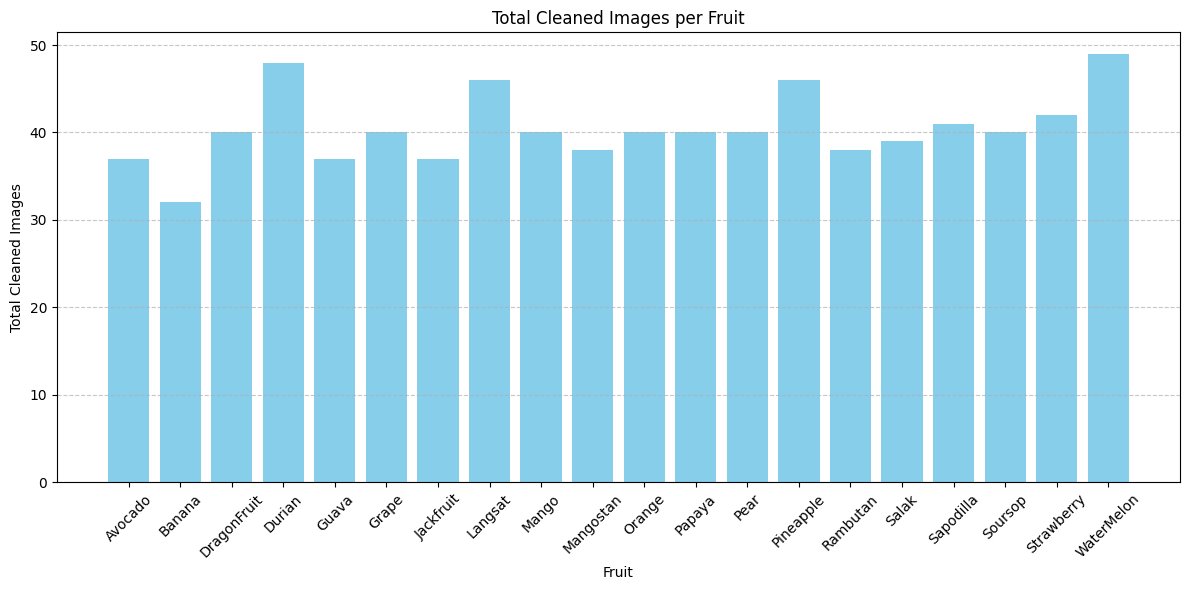

In [14]:
plt.figure(figsize=(12, 6))
plt.bar(cleaned_images_count.keys(), cleaned_images_count.values(), color='skyblue')
plt.xlabel('Fruit')
plt.ylabel('Total Cleaned Images')
plt.title('Total Cleaned Images per Fruit')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Tahap Augmentasi

In [6]:
# Fungsi untuk augmentasi data gambar
def augment_images(images, output_folder, augment_count=2): #disini aku pilih 2 karena aku asumsikan datset yang baru buatan mas duevano sudah ada 400 dan akan aku kalikan 2 biar jadi 800 dataset 
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    augmented_images = []
    for idx, image in enumerate(images):
        try:
            print(f'Processing image {idx+1}/{len(images)}')
            if image.shape != (128, 128, 3):
                print(f'Skipping image {idx+1} due to incorrect shape: {image.shape}')
                continue

            image = image.reshape((1, 128, 128, 3))
            i = 0
            for batch in train_datagen.flow(image, batch_size=1): #gambar augmentasi 1 per 1
                augmented_images.append(batch[0]) #nambah gambar 
                img = Image.fromarray((batch[0] * 255).astype(np.uint8))  # Mengubah kembali nilai piksel menjadi integer 0-255 (mengonversoi pixel ke interger 8-bit)
                img_path = os.path.join(output_folder, f'augmented_image_{idx}_{i}.jpg')
                img.save(img_path)
                i += 1
                if i >= augment_count:  # Augmentasi beberapa gambar per gambar asli
                    break
            print(f'Image {idx+1} augmented {i} times') # 
        except Exception as e:
            print(f'Error processing image {idx+1}: {e}')

    return np.array(augmented_images)

In [7]:
# Data Augmentasi
train_datagen = ImageDataGenerator(
    rotation_range=40,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [19]:
augmented_images_count = {}

In [20]:
# Loop melalui setiap folder dan lakukan pembersihan serta augmentasi
for folder in folders:
    image_folder = os.path.join(base_input_folder, folder)
    output_augmented_folder = os.path.join(base_augmented_folder, folder)

    # Augmentasi data gambar
    augmented_images = augment_images(cleaned_images, output_augmented_folder)
    print(f'Total augmented images in {folder}: {len(augmented_images)}')

     # Simpan jumlah augmented images untuk setiap folder
    augmented_images_count[folder] = len(augmented_images)

Processing image 1/49
Image 1 augmented 2 times
Processing image 2/49
Image 2 augmented 2 times
Processing image 3/49
Image 3 augmented 2 times
Processing image 4/49
Image 4 augmented 2 times
Processing image 5/49
Image 5 augmented 2 times
Processing image 6/49
Image 6 augmented 2 times
Processing image 7/49
Image 7 augmented 2 times
Processing image 8/49
Image 8 augmented 2 times
Processing image 9/49
Image 9 augmented 2 times
Processing image 10/49
Image 10 augmented 2 times
Processing image 11/49
Image 11 augmented 2 times
Processing image 12/49
Image 12 augmented 2 times
Processing image 13/49
Image 13 augmented 2 times
Processing image 14/49
Image 14 augmented 2 times
Processing image 15/49
Image 15 augmented 2 times
Processing image 16/49
Image 16 augmented 2 times
Processing image 17/49
Image 17 augmented 2 times
Processing image 18/49
Image 18 augmented 2 times
Processing image 19/49
Image 19 augmented 2 times
Processing image 20/49
Image 20 augmented 2 times
Processing image 2

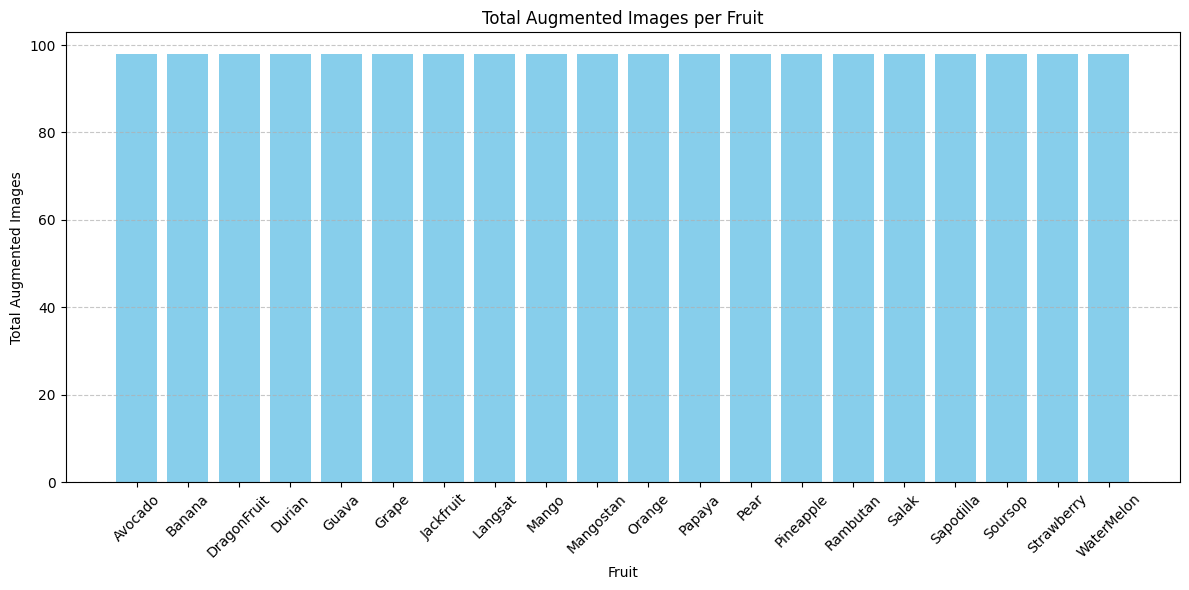

In [21]:
# Buat grafik data augmentasi
plt.figure(figsize=(12, 6))
plt.bar(augmented_images_count.keys(), augmented_images_count.values(), color='skyblue')
plt.xlabel('Fruit')
plt.ylabel('Total Augmented Images')
plt.title('Total Augmented Images per Fruit')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()